![](static/python.jpg)

## Machine Learning con Python

### Módulos
* NumPy (fundamental para el cálculo científico en Python; eficientes arrays multidimensionales...)
* Matplotlib (fácil visualización en 2D)
* Pandas (basado en NumPy, flexibles estructuras de datos: Dataframe; carga y visualización de datos)
* SciPy (basado en NumPy, software para matemática/ciencia/ingeniería: integración numérica, optimización)
* Sklearn (Scikit-Learn. Basado en NumPy, SciPy y Matplotlib; simple y eficientes métodos para ML/Data-Mining)
* ...

### Trabajo con NumPy

Los arrays Numpy son una alternativa a las listas de Python 

Algunas de las ventajas de los arrays NumPy:
* eficiencia
* facilidad de uso 
* permite cálculos a través de todo el array


In [2]:
# Creación de Arrays NumPy
import numpy as np
values = [2,3,4,1,8,2]
np_values = np.array(values)

In [12]:
# Operaciones sobre los elementos
print(np_values**2/4)
print(np.exp(np_values))
print(np.log10(np_values))

[ 1  2  4  0 16  1]
[  7.38905610e+00   2.00855369e+01   5.45981500e+01   2.71828183e+00
   2.98095799e+03   7.38905610e+00]
[ 0.30103     0.47712125  0.60205999  0.          0.90308999  0.30103   ]


In [16]:
# Subsetting
print(np_values > 3)
print(np_values[np_values>3])

[False False  True False  True False]
[4 8]


### Pandas: Trabajos con Dataframes

In [3]:
# Creación de Dataframes
import pandas as pd
data = {'año': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'equipo': ['BCN', 'BCN', 'BCN', 'ATM', 'ATM', 'RMA', 'RMA', 'RMA'],
        'ganados': [11, 8, 10, 15, 11, 6, 10, 4],
        'perdidos': [5, 8, 6, 1, 5, 10, 6, 12]}
futbol = pd.DataFrame(data, columns=['año', 'equipo', 'ganados', 'perdidos'])
print(futbol)

    año equipo  ganados  perdidos
0  2010    BCN       11         5
1  2011    BCN        8         8
2  2012    BCN       10         6
3  2011    ATM       15         1
4  2012    ATM       11         5
5  2010    RMA        6        10
6  2011    RMA       10         6
7  2012    RMA        4        12


In [25]:
type(futbol)
#dir(futbol)
#help(futbol)

pandas.core.frame.DataFrame

In [27]:
# Inspeccion del Dataframe
futbol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
año         8 non-null int64
equipo      8 non-null object
ganados     8 non-null int64
perdidos    8 non-null int64
dtypes: int64(3), object(1)
memory usage: 328.0+ bytes


In [28]:
# Estadisticas descriptivas
futbol.describe()

,año,ganados,perdidos
count,8.000000,8.000000,8.000000
mean,2011.125000,9.375000,6.625000
std,0.834523,3.377975,3.377975
min,2010.000000,4.000000,1.000000
25%,2010.750000,7.500000,5.000000
50%,2011.000000,10.000000,6.000000
75%,2012.000000,11.000000,8.500000
max,2012.000000,15.000000,12.000000


In [40]:
# Primeros tres Registros
futbol.head(3)

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6


In [30]:
# Ultimos dos Registros
futbol.tail(2)

,año,equipo,ganados,perdidos
6,2011,RMA,10,6
7,2012,RMA,4,12


In [33]:
# Subconjunto de Registros
futbol[1:3]

,año,equipo,ganados,perdidos
1,2011,BCN,8,8
2,2012,BCN,10,6


In [34]:
# Subconjunto de filas y columnas
futbol[['ganados', 'perdidos']][2:4]

,ganados,perdidos
2,10,6
3,15,1


In [35]:
# Filtros
futbol[futbol.ganados<10]

,año,equipo,ganados,perdidos
1,2011,BCN,8,8
5,2010,RMA,6,10
7,2012,RMA,4,12


In [41]:
# Mezcla de Dataframes
data2 = {'año': [2011, 2012, 2013, 2014],
        'nro_equipos': [19, 20, 21, 22]}
df2  = pd.DataFrame(data2, columns=['año', 'nro_equipos'])
df2

,año,nro_equipos
0,2011,19
1,2012,20
2,2013,21
3,2014,22


In [43]:
# Mezcla (inner join)
pd.merge(futbol, df2)

,año,equipo,ganados,perdidos,nro_equipos
0,2011,BCN,8,8,19
1,2011,ATM,15,1,19
2,2011,RMA,10,6,19
3,2012,BCN,10,6,20
4,2012,ATM,11,5,20
5,2012,RMA,4,12,20


In [44]:
# Joins: left, right, outer, inner
pd.merge(futbol, df2, on='año', how='inner')

,año,equipo,ganados,perdidos,nro_equipos
0,2011,BCN,8,8,19
1,2011,ATM,15,1,19
2,2011,RMA,10,6,19
3,2012,BCN,10,6,20
4,2012,ATM,11,5,20
5,2012,RMA,4,12,20


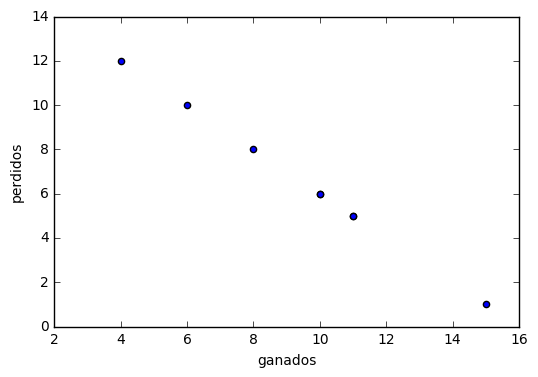

In [46]:
# Plot
futbol.plot(kind='scatter', x='ganados', y='perdidos')

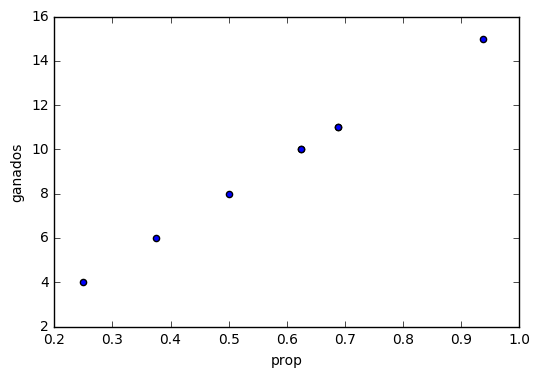

In [47]:
# Columnas Calculadas
futbol.assign(prop = lambda x: x.ganados/(x.ganados + x.perdidos) ).plot(kind='scatter', x='prop', y='ganados')

In [49]:
# Transposición del Dataframe
futbol.T

,0,1,2,3,4,5,6,7
año,2010,2011,2012,2011,2012,2010,2011,2012
equipo,BCN,BCN,BCN,ATM,ATM,RMA,RMA,RMA
ganados,11,8,10,15,11,6,10,4
perdidos,5,8,6,1,5,10,6,12


In [54]:
# Producto de Matrices
df3 = futbol[["ganados", "perdidos"]]
print(df3)
df3.T.dot(df3)

   ganados  perdidos
0       11         5
1        8         8
2       10         6
3       15         1
4       11         5
5        6        10
6       10         6
7        4        12


,ganados,perdidos
ganados,783,417
perdidos,417,431


In [56]:
# Creación de Series 
pd.Series(np.arange(5,10))

0    5
1    6
2    7
3    8
4    9
dtype: int64

In [57]:
# Creación de Series con Indices
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

a   -0.260047
b    1.628600
c   -0.447016
d   -0.534175
e    0.500307
dtype: float64

In [4]:
# Reading and Writing Data Files
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()
#data.to_csv('data/Advertising2.csv', sep='\t')

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
from os import listdir
from os.path import isfile, join

mi_path = "./data"
for archivo in listdir(mi_path):
    print archivo

Advertising.csv
